100%|██████████| 100000/100000 [00:01<00:00, 71154.91it/s]


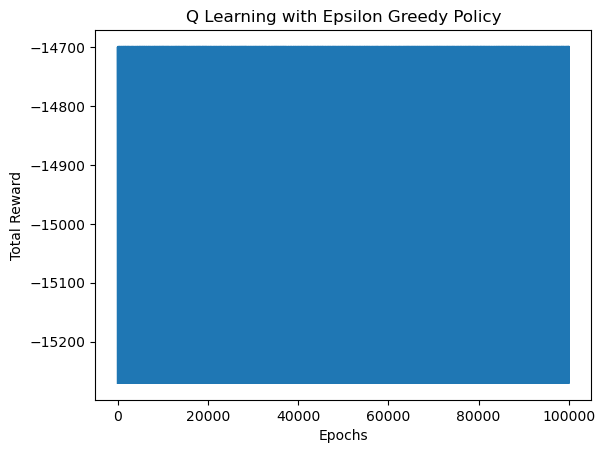

In [3]:
# q learning with epsilon greedy policy


import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


class QLearning:
    def __init__(self):
        self.alpha = 0.1
        self.gamma = 0.6
        self.epsilon = 0.1
        self.q_table = np.zeros((100, 100, 4))
        self.power_range = np.linspace(50.0, 400.0, 100)
        self.scan_speed_range = np.linspace(0.2, 3, 100)
        self.epochs = 100000
        self.absorptivity = 0.3
        self.rho = 2500.0
        self.Cp = 915.0
        self.T_solid = 853.0
        self.T_0 = 300.0
        self.hf = 40000.0
        self.Diffusivity = 0.000097
        self.beam_diameter = 0.0001
        self.start_reward = -1
        self.lr = 0.1
        self.starting_power = 150
        self.starting_scan_speed = 1

    def H_star(self, power, scan_speed):
        H = ((4 * self.absorptivity * power ) / (np.pi * self.rho * (self.Cp * (self.T_solid - self.T_0) + self.hf) * np.sqrt(self.Diffusivity * (scan_speed/10) * self.beam_diameter**3)))
        return H
    
    def reward(self, power, scan_speed):
        reward = (-0.01*(self.H_star(power, scan_speed/10) - 150)**2) - 1000*((scan_speed/10 - 3)**2) - 0.1*(power - 300)**2
        return reward
    
    def action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice([0, 1, 2, 3])
        else:
            action = np.argmax(self.q_table[state[0], state[1]])
        return action
    
    def state(self, power, scan_speed):
        power_index = np.abs(self.power_range - power).argmin()
        scan_speed_index = np.abs(self.scan_speed_range - scan_speed).argmin()
        return (power_index, scan_speed_index)
    
    def update_q_table(self, state, action, reward, next_state):
        predict = self.q_table[state[0], state[1], action]
        target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (target - predict)

    def train(self):
        # print the average reward every 1000 epochs
        rewards = []
        for epoch in tqdm(range(self.epochs)):
            power = self.starting_power
            scan_speed = self.starting_scan_speed
            state = self.state(power, scan_speed)
            total_reward = 0
            while True:
                action = self.action(state)
                power = self.power_range[action]
                scan_speed = self.scan_speed_range[action]
                reward = self.reward(power, scan_speed)
                next_state = self.state(power, scan_speed)
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                total_reward += reward
                if total_reward < -1000:
                    break
            rewards.append(total_reward)
        return rewards
    
    def plot(self, rewards):
        plt.plot(rewards)
        plt.xlabel('Epochs')
        plt.ylabel('Total Reward')
        plt.title('Q Learning with Epsilon Greedy Policy')
        plt.show()


q = QLearning()
rewards = q.train()
q.plot(rewards)




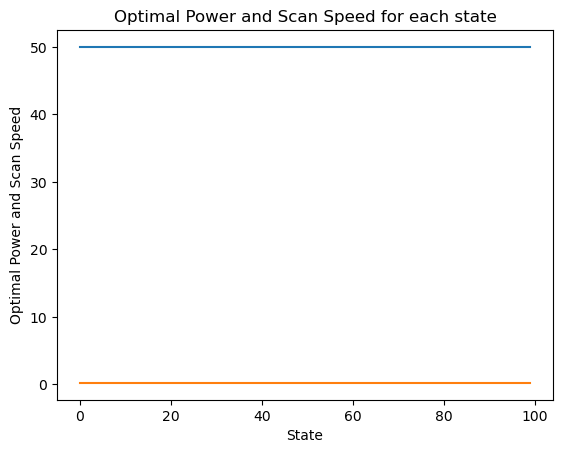

In [4]:
# print the optimal power and scan speed
optimal_power = []
optimal_scan_speed = []
for i in range(100):
    optimal_power.append(q.power_range[np.argmax(q.q_table[i])])
    optimal_scan_speed.append(q.scan_speed_range[np.argmax(q.q_table[i])])
plt.plot(optimal_power)
plt.plot(optimal_scan_speed)
plt.xlabel('State')
plt.ylabel('Optimal Power and Scan Speed')
plt.title('Optimal Power and Scan Speed for each state')
plt.show()

